In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

## 最小二乗法
---
残差の二乗和 $\displaystyle \sum ^{n}_{i=1} e^{2}_{i} =\sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}$ が最小になるように係数を決める方法。  
いくつかの重要な性質を持つ。

## 単回帰方程式の解
---
単回帰方程式 $\boldsymbol{y} =a+b\boldsymbol{x}$ の回帰係数 $a,b$ の解は、 $x$ の分散 $V( x)$ と $x,y$ の共分散 $Cov( x,y)$ を用いて $\displaystyle a=\overline{\boldsymbol{y}} +b\overline{\boldsymbol{x}} ,b=\frac{Cov( x,y)}{V( x)}$ と表される。

$a=\overline{y} -b\overline{x}$ を $\hat{y} =a+bx$ に代入して整理すると、$\hat{y} -\overline{y} =b\left( x-\overline{x}\right)$ となる。つまり、最小二乗法で決定された回帰直線 $\hat{y} =a+bx$ は**データセットの中心 (平均) である $\left(\overline{x} ,\overline{y}\right)$ を通る**傾き $b$ の直線。

###### 証明

残差二乗和 ${\displaystyle S=\sum_{i=1}^{n}e_{i}^2}$ を最小化するための回帰係数 $a, b$ を求めるには $S$ を $a, b$ で偏微分した

$
\begin{cases}
    \displaystyle \frac
        {\partial S}
        {\partial a}
    & \displaystyle =\sum ^{n}_{i=1}\{2a-2( y_{i} -bx_{i})\} & \displaystyle =-2\sum ^{n}_{i=1}( y_{i} -a-bx_{i}) & =0 & \cdots ( 1)\\
    \displaystyle \frac
        {\partial S}
        {\partial b}
    & \displaystyle =\sum ^{n}_{i=1}\left\{2x^{2}_{i} b-2( y_{i} -a) x_{i}\right\} & \displaystyle =-2\sum ^{n}_{i=1}( y_{i} -a-bx_{i}) x_{i} & =0 & \cdots ( 2)
\end{cases}
$

を解けば良い。

$(1)$ より

$
\displaystyle \begin{aligned}
    -2\sum ^{n}_{i=1}( y_{i} -a-bx_{i}) & =0\\
    \sum ^{n}_{i=1} y_{i} -\sum ^{n}_{i=1} a-b\sum ^{n}_{i=1} x_{i} & =0\\
    n\overline{y} -na-nb\overline{x} & =0\\
    a & =\overline{y} -b\overline{x}
\end{aligned}
$

これを $(2)$ に代入して

$
\displaystyle \begin{aligned}
    -2\sum ^{n}_{i=1}\left\{y_{i} -\left(\overline{y} -b\overline{x}\right) -bx_{i}\right\} x_{i} & =0\\
     & \\
    \sum ^{n}_{i=1}\left\{\left( y_{i} -\overline{y}\right) -b\left( x_{i} -\overline{x}\right)\right\} x_{i} & =0\\
     & \\
    b\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) x_{i} & =\sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right) x_{i}\\
     & \\
    b & =\frac
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right) x_{i}}
        {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) x_{i}}
\end{aligned}
$

ここで、 $
\displaystyle \overline{x} =\frac
    {\displaystyle \sum ^{n}_{i=1} x_{i}}
    {n}
,\overline{y} =\frac
    {\displaystyle \sum ^{n}_{i=1} y_{i}}
    {n}
$ より

$
\displaystyle \begin{aligned}
    b & =\frac
        {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right) x_{i} -\overline{x}\left(\sum ^{n}_{i=1} y_{i} -n\overline{y}\right)}
        {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) x_{i} -\overline{x}\left(\sum ^{n}_{i=1} x_{i} -n\overline{x}\right)}
    \\
     & \\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right) x_{i} -\overline{x}\sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)}
         {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right) x_{i} -\overline{x}\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)}
     \\
     & \\
     & =\frac
         {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( y_{i} -\overline{y}\right)}
         {\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
     \\
     & \\
     & =\frac
         {Cov( x,y)}
         {V( x)}
\end{aligned}
$

また $x,y$ を標準化した場合、回帰方程式は $y=r_{xy}x$ となり回帰係数と相関係数が一致する。

###### 証明

$
\displaystyle r=\frac
    {Cov( x,y)}
    {\sqrt{
        V( x) V( y)
    }}
$ より

$
\displaystyle \begin{aligned}
    b & =\frac
        {Cov( x,y)}
        {V( x)}
    \\
     & \\
     & =\frac
         {r\sqrt{
             V( x) V( y)
         }}
         {V( x)}
     \\
     & \\
     & =r\frac
         {S( y)}
         {S( x)}
\end{aligned}
$

さらに

$
\displaystyle \begin{aligned}
    \hat{y} -\overline{y} & =b\left( x-\overline{x}\right)\\
     & \\
    \hat{y} -\overline{y} & =r\frac
        {S( y)}
        {S( x)}
    \left( x-\overline{x}\right)\\
     & \\
    \frac
        {\hat{y} -\overline{y}}
        {S( y)}
    & =r\frac
        {x-\overline{x}}
        {S( x)}
\end{aligned}
$

## 重回帰方程式の解
---
複数の変数 (特徴) を持つデータ $x_{1} ,x_{2} ,\cdots ,x_{k}$ に対して、 $y=a+b_{1} x_{1} +b_{2} x_{2} +\cdots +b_{k} x_{k}$ で予測値を導くものを重回帰分析という。

$
\displaystyle X=\begin{pmatrix}
    1, & x_{11} , & x_{12} , & \cdots , & x_{1k}\\
    1, & x_{21} , & x_{22} , & \cdots , & x_{2k}\\
    \vdots  & \vdots  & \vdots  & \ddots  & \vdots \\
    1, & x_{n1} , & x_{n2} , & \cdots , & x_{nk}
    \end{pmatrix} ,y=\begin{pmatrix}
    y_{1}\\
    y_{2}\\
    \vdots \\
    y_{n}
    \end{pmatrix} ,b=\begin{pmatrix}
    a\\
    b_{1}\\
    b_{2}\\
    \vdots \\
    b_{k}
\end{pmatrix}
$ とすると、重回帰方程式 $\displaystyle y=Xb$ の解は $b=\left( X^{T} X\right)^{-1} X^{T} y$ と表される。

重回帰の場合も単回帰と同様、回帰方程式が表す予測超平面はデータセットの中心を通る。

###### 証明

残差平方和 ${\displaystyle S=\sum_{i=1}^{n}e^2_i}$ を回帰係数で偏微分して0となるように置いた以下の連立方程式の解として求められる。

$
\left\{\begin{aligned}
    \frac
        {\partial S}
        {\partial a}
    & =\sum ^{n}_{i=1}\{2a-2( y-b_{1} x_{i1} -b_{2} x_{i2} -\dots -b_{k} x_{ik})\} & = & -2\sum ^{n}_{i=1}( y_{i} -a-b_{1} x_{i1} -b_{2} x_{i2} -\dots -b_{k} x_{ik}) & = & 0\\
    \frac
        {\partial S}
        {\partial b_{1}}
    & =\sum ^{n}_{i=1}\left\{2b_{1} x^{2}_{i1} -2x_{i1}( y-a-b_{2} x_{i2} -\dots -b_{k} x_{ik})\right\} & = & -2\sum ^{n}_{i=1}( y_{i} -a-b_{1} x_{i1} -b_{2} x_{i2} -\dots -b_{k} x_{ik}) x_{i1} & = & 0\\
    \frac
        {\partial S}
        {\partial b_{2}}
    & =\sum ^{n}_{i=1}\left\{2b_{2} x^{2}_{i2} -2x_{i2}( y-a-b_{1} x_{i1} -\dots -b_{k} x_{ik})\right\} & = & -2\sum ^{n}_{i=1}( y_{i} -a-b_{1} x_{i1} -b_{2} x_{i2} -\dots -b_{k} x_{ik}) x_{i2} & = & 0\\
    \vdots  &  &  &  &  & \\
    \frac
        {\partial S}
        {\partial b_{k}}
    & =\sum ^{n}_{i=1}\left\{2b_{k} x^{2}_{ik} -2x_{ik}( y-a-b_{1} x_{i1} -\dots -b_{k-1} x_{ik-1})\right\} & = & -2\sum ^{n}_{i=1}( y_{i} -a-b_{1} x_{i1} -b_{2} x_{i2} -\dots -b_{k} x_{ik}) x_{ik} & = & 0
\end{aligned}\right. 
$

これを整理すると以下の式が得られる。

$
\left\{\begin{aligned}
     & \sum ^{n}_{i=1} y_{i} & = & \sum ^{n}_{i=1}( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots b_{k} x_{ik})\\
     & \sum ^{n}_{i=1} x_{i1} y_{i} & = & \sum ^{n}_{i=1}( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots b_{k} x_{ik}) x_{i1}\\
     & \sum ^{n}_{i=1} x_{i2} y_{i} & = & \sum ^{n}_{i=1}( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots b_{k} x_{ik}) x_{i2}\\
     & \vdots  &  & \vdots \\
     & \sum ^{n}_{i=1} x_{ik} y_{i} & = & \sum ^{n}_{i=1}( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots b_{k} x_{ik}) x_{ik}
\end{aligned}\right.
$

これをベクトル化すると $X^{T} y=X^{T} Xb$ (正規方程式) となる。

したがって、 $b=\left( X^{T} X\right)^{-1} X^{T} y$

## 偏差平方和分解
---
目的変数の偏差平方和 (総変動) $\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}$ は $\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} =\sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2} +\sum ^{n}_{i=1} e^{2}_{i}$ と、予測値の偏差平方和と残差の偏差平方和に分解できる。

###### 証明

$
\displaystyle \begin{aligned}
    \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} & =\sum ^{n}_{i=1}\left\{\left( y_{i} -\hat{y}_{i}\right) -\left(\overline{y} -\hat{y}_{i}\right)\right\}^{2}\\
     & \\
     & =\sum ^{n}_{i=1}\left\{\hat{e}_{i} -\left(\overline{y} -\hat{y}_{i}\right)\right\}^{2}\\
     & \\
     & =\sum ^{n}_{i=1}\hat{e}^{2}_{i} -2\sum ^{n}_{i=1}\hat{e}_{i}\left(\overline{y} -\hat{y}_{i}\right) +\sum ^{n}_{i=1}\left(\overline{y} -\hat{y}_{i}\right)^{2}\\
     & \\
     & =\sum ^{n}_{i=1}\hat{e}^{2}_{i} -2\sum ^{n}_{i=1}\left(\overline{y} -\hat{a} -\hat{b} x_{i}\right)\hat{e}_{i} +\sum ^{n}_{i=1}\left(\overline{y} -\hat{y}_{i}\right)^{2}\\
     & \\
     & =\sum ^{n}_{i=1}\hat{e}^{2}_{i} -2\left(\overline{y} -\hat{a}\right)\sum ^{n}_{i=1}\hat{e}_{i} +2\hat{b}\sum ^{n}_{i=1}\hat{e}_{i} x_{i} +\sum ^{n}_{i=1}\left(\overline{y} -\hat{y}_{i}\right)^{2}
\end{aligned}
$

ここで、 $\hat{a} ,\hat{b}$ は

$
\begin{cases}
    \displaystyle \frac
        {\partial S}
        {\partial a}
    & \displaystyle =\sum ^{n}_{i=1}\{2a-2( y_{i} -bx_{i})\} & \displaystyle =-2\sum ^{n}_{i=1}( y_{i} -a-bx_{i}) & =0\\
    \displaystyle \frac
        {\partial S}
        {\partial b}
    & \displaystyle =\sum ^{n}_{i=1}\left\{2x^{2}_{i} b-2( y_{i} -a) x_{i}\right\} & \displaystyle =-2\sum ^{n}_{i=1}( y_{i} -a-bx_{i}) x_{i} & =0
\end{cases}
$

の解なので、 ${\displaystyle \sum ^{n}_{i=1}\hat{e}_{i} =\sum ^{n}_{i=1}\left( y_{i} -\hat{a} -\hat{b} x_{i}\right) =0,\ \sum ^{n}_{i=1}\hat{e}_{i} x_{i} =\sum ^{n}_{i=1}\left( y_{i} -\hat{a} -\hat{b} x_{i}\right) x_{i} =0}$

したがって、 ${\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} =\sum ^{n}_{i=1}\hat{e}^{2}_{i} +\sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2}}$

また、 $
\displaystyle V( x) =\frac
    {1}
    {n}
\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}
$ より $\displaystyle V( y) =V\left(\hat{y}\right) +V( e)$

### 最小二乗法の幾何的意味と平方和分解
---
説明変数・目的変数・予測値のベクトルをそれぞれ $\displaystyle \boldsymbol{x} =\left( x_{1} -\overline{x} ,x_{2} -\overline{x} ,\dotsc ,x_{n} -\overline{x}\right) ,\boldsymbol{y} =\left( y_{1} -\overline{y} ,y_{2} -\overline{y} ,\dotsc ,y_{n} -\overline{y}\right) ,\boldsymbol{\hat{y}} =\left(\hat{y}_{1} -\overline{y} ,\hat{y}_{2} -\overline{y} ,\dotsc ,\hat{y}_{n} -\overline{y}\right)$ とすると、最小二乗法で決定された回帰直線はデータセットの中心を通るので、 $\displaystyle \boldsymbol{\hat{y}} =b\boldsymbol{x}$  。  
したがって、 $\boldsymbol{x}$ と $\boldsymbol{\hat{y}}$ は同じ向きのベクトル。  
また、残差のベクトル $\displaystyle \boldsymbol{e} =y-\boldsymbol{\hat{y}}$ の長さは

$
\displaystyle \begin{aligned}
    \| \boldsymbol{e} \|  & =\sqrt{
        \sum ^{n}_{i=1} e^{2}_{i}
    }\\
     & =\sqrt{
         \sum ^{n}_{i=1}\left( y_{i} -\hat{y}_{i}\right)^{2}
     }
\end{aligned}
$

なので、最小二乗法はベクトル $\boldsymbol{x}$ の線上で残差ベクトル $\boldsymbol{e}$ の長さが最小になるように係数を決定していると見ることができる。  
この条件で残差ベクトル $\boldsymbol{e}$ の長さが最小になるのは $\boldsymbol{e}$ と $\boldsymbol{\hat{y}}$ が直交するとき。

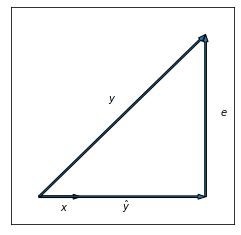

In [2]:
from my_functions.ordinary_least_squares import orthogonal
orthogonal.show()

上の図より、三平方の定理を用いて平方和分解が導ける。

$
\displaystyle \begin{aligned}
    \| \boldsymbol{y} \| ^{2} & =\| \hat{\boldsymbol{y}} \| ^{2} & + & \| \boldsymbol{e} \| ^{2}\\
    \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2} & =\sum ^{n}_{i=1}\left(\hat{y}_{i} -\overline{y}\right)^{2} & + & \sum ^{n}_{i=1} e^{2}_{i}\\
    V( y) & =V\left(\hat{y}\right) & + & V( e)
\end{aligned}
$

###### 練習問題

`boston`データセットのうち`LSTAT`列を用いて単回帰分析を実施し、説明変数と残差の相関係数を確認する。

In [3]:
loader = load_boston()
boston = pd.DataFrame(np.column_stack([loader.data, loader.target]), columns=list(loader.feature_names)+['target'])
print('boston')
display(boston)

boston


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [4]:
x = boston['LSTAT'].values.reshape(-1, 1)
y = boston['target']
model = LinearRegression().fit(x, y)
y_hat = model.predict(x)
e = y - y_hat
cor = np.corrcoef(x.ravel(), e)[0, 1]
print(f'相関係数 : {cor:.3f}')

相関係数 : -0.000


###### 練習問題

`boston`データセットに対して重回帰分析を実施し、予測値と残差の相関係数を確認する。

In [5]:
x = boston.iloc[:, :-1]
y = boston.iloc[:, -1]
model = LinearRegression().fit(x, y)
y_hat = model.predict(x)
e = y - y_hat
cor = np.corrcoef(y_hat, e)[0, 1]
print(f'相関係数 : {cor:.3f}')

相関係数 : -0.000


また、 2 つのベクトル $\hat{y}$ と $e$ が直交する (無相関である) ことを前提とすれば、[分散の性質](mean_and_variance.ipynb#%E5%B9%B3%E5%9D%87-(%E6%9C%9F%E5%BE%85%E5%80%A4)-%E3%81%A8%E5%88%86%E6%95%A3%E3%81%AE%E6%80%A7%E8%B3%AA)からも

$
\displaystyle \begin{aligned}
    V( y) & =V\left(\hat{y} +e\right)\\
     & =V\left(\hat{y}\right) +2Cov\left(\hat{y} ,e\right) +V( e)\\
     & =V\left(\hat{y}\right) +V( e)
\end{aligned}
$

と分散 (平方和) の分解が導ける。